In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import plotly.express as px
from  pandas import json_normalize

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
df = pd.read_csv('C:/Users/maity/OneDrive/Desktop/darkArmy/BankChurners.csv')

In [3]:
df.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2','CLIENTNUM','Avg_Open_To_Buy'],axis='columns',inplace=True)

In [4]:
df.head(5)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,2.175,816,28,2.500,0.000


In [5]:
df['Attrition_Flag'] = (df['Attrition_Flag']=='Existing Customer').astype('int32')

In [6]:
df.Attrition_Flag.value_counts()


1    8500
0    1627
Name: Attrition_Flag, dtype: int64

In [7]:
df.head(4)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,1.335,1144,42,1.625,0.061
1,1,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,1.541,1291,33,3.714,0.105
2,1,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,2.594,1887,20,2.333,0.000
3,1,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,1.405,1171,20,2.333,0.760


In [8]:
df.corr()['Attrition_Flag']

Attrition_Flag              1.000000
Customer_Age               -0.018203
Dependent_count            -0.018991
Months_on_book             -0.013687
Total_Relationship_Count    0.150005
Months_Inactive_12_mon     -0.152449
Contacts_Count_12_mon      -0.204491
Credit_Limit                0.023873
Total_Revolving_Bal         0.263053
Total_Amt_Chng_Q4_Q1        0.131063
Total_Trans_Amt             0.168598
Total_Trans_Ct              0.371403
Total_Ct_Chng_Q4_Q1         0.290054
Avg_Utilization_Ratio       0.178410
Name: Attrition_Flag, dtype: float64

In [9]:
df.Gender.value_counts()

F    5358
M    4769
Name: Gender, dtype: int64

In [10]:
df['Gender'] = (df['Gender']=='M').astype('int32')

In [11]:
df.head(3)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1,45,1,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,1.335,1144,42,1.625,0.061
1,1,49,0,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,1.541,1291,33,3.714,0.105
2,1,51,1,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,2.594,1887,20,2.333,0.000


In [12]:
df.Marital_Status.value_counts()


Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64

In [13]:
pd.get_dummies(df,columns=['Marital_Status'],drop_first=True)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,...,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown
0,1,45,1,3,High School,$60K - $80K,Blue,39,5,1,...,12691.0,777,1.335,1144,42,1.625,0.061,1,0,0
1,1,49,0,5,Graduate,Less than $40K,Blue,44,6,1,...,8256.0,864,1.541,1291,33,3.714,0.105,0,1,0
2,1,51,1,3,Graduate,$80K - $120K,Blue,36,4,1,...,3418.0,0,2.594,1887,20,2.333,0.000,1,0,0
3,1,40,0,4,High School,Less than $40K,Blue,34,3,4,...,3313.0,2517,1.405,1171,20,2.333,0.760,0,0,1
4,1,40,1,3,Uneducated,$60K - $80K,Blue,21,5,1,...,4716.0,0,2.175,816,28,2.500,0.000,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,1,50,1,2,Graduate,$40K - $60K,Blue,40,3,2,...,4003.0,1851,0.703,15476,117,0.857,0.462,0,1,0
10123,0,41,1,2,Unknown,$40K - $60K,Blue,25,4,2,...,4277.0,2186,0.804,8764,69,0.683,0.511,0,0,0
10124,0,44,0,1,High School,Less than $40K,Blue,36,5,3,...,5409.0,0,0.819,10291,60,0.818,0.000,1,0,0
10125,0,30,1,2,Graduate,$40K - $60K,Blue,36,4,3,...,5281.0,0,0.535,8395,62,0.722,0.000,0,0,1


In [14]:
df.Card_Category.value_counts()

Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64

In [15]:
def card(Card_Category):
    if Card_Category == 'Platinum':
        return 4
    elif Card_Category == 'Gold':
        return 3
    elif Card_Category == 'Silver':
        return 2
    else:
        return 1

In [16]:
df['Card_Category'] = df['Card_Category'].apply(card)

In [17]:
df.sample(10)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
7250,1,42,0,4,Uneducated,Divorced,Unknown,1,38,6,3,2,10039.0,1600,0.700,4685,76,0.900,0.159
6986,1,45,0,4,Uneducated,Married,Unknown,1,39,6,3,1,1438.3,0,0.825,4596,71,0.732,0.000
9009,1,44,0,2,Unknown,Single,Less than $40K,3,30,1,3,3,15365.0,630,0.807,7890,91,0.685,0.041
9234,1,51,1,3,Doctorate,Single,$80K - $120K,1,38,2,3,2,31346.0,1318,0.862,13303,92,0.804,0.042
5489,1,42,0,4,Graduate,Single,Unknown,1,36,3,3,3,9396.0,1870,0.714,4301,71,0.651,0.199
4502,1,65,0,0,Uneducated,Unknown,Less than $40K,2,53,5,1,2,11097.0,0,0.648,4836,83,0.566,0.000
8209,1,40,0,4,Graduate,Single,$40K - $60K,1,27,2,2,2,2625.0,1594,0.544,2480,47,0.567,0.607
8219,1,42,0,2,High School,Single,Less than $40K,1,23,2,2,3,3172.0,1160,0.588,4163,83,0.804,0.366
168,0,46,1,5,Graduate,Single,$80K - $120K,1,33,6,3,3,32975.0,2517,0.658,597,17,0.700,0.076
6370,1,50,1,3,Unknown,Married,$60K - $80K,1,36,4,3,2,3276.0,2353,0.725,4488,92,0.736,0.718


In [18]:
df.Education_Level.value_counts()

Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64

In [19]:
def Edu(Education_Level):
    if Education_Level =='Doctorate':
        return 6
    elif Education_Level == 'Post-Graduate':
        return 5
    elif Education_Level == 'Graduate':
        return 4
    elif Education_Level == 'College':
        return 3
    elif Education_Level == 'High School':
        return 2
    elif Education_Level == 'Uneducated':
        return 1
    else: 
        return 0

In [20]:
df['Education_Level'] = df['Education_Level'].apply(Edu)

In [21]:
df

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1,45,1,3,2,Married,$60K - $80K,1,39,5,1,3,12691.0,777,1.335,1144,42,1.625,0.061
1,1,49,0,5,4,Single,Less than $40K,1,44,6,1,2,8256.0,864,1.541,1291,33,3.714,0.105
2,1,51,1,3,4,Married,$80K - $120K,1,36,4,1,0,3418.0,0,2.594,1887,20,2.333,0.000
3,1,40,0,4,2,Unknown,Less than $40K,1,34,3,4,1,3313.0,2517,1.405,1171,20,2.333,0.760
4,1,40,1,3,1,Married,$60K - $80K,1,21,5,1,0,4716.0,0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,1,50,1,2,4,Single,$40K - $60K,1,40,3,2,3,4003.0,1851,0.703,15476,117,0.857,0.462
10123,0,41,1,2,0,Divorced,$40K - $60K,1,25,4,2,3,4277.0,2186,0.804,8764,69,0.683,0.511
10124,0,44,0,1,2,Married,Less than $40K,1,36,5,3,4,5409.0,0,0.819,10291,60,0.818,0.000
10125,0,30,1,2,4,Unknown,$40K - $60K,1,36,4,3,3,5281.0,0,0.535,8395,62,0.722,0.000


In [22]:
df.Income_Category.value_counts()

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64

In [23]:
def Inco(Income_Category):
    if Income_Category == '$120K +':
        return 5
    elif Income_Category == '$80K - $120K':
        return 4
    elif Income_Category == '$60K - $80K':
        return 3
    elif Income_Category == '$40K - $60K':
        return 2
    elif Income_Category == 'Less than $40K':
        return 1
    else :
        return 0

In [24]:
df['Income_Category'] = df['Income_Category'].apply(Inco)

In [25]:
df.drop('Marital_Status',axis='columns',inplace=True)

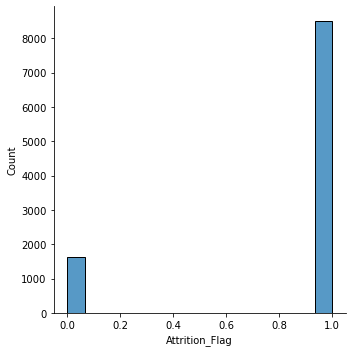

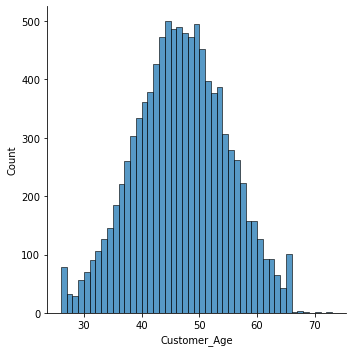

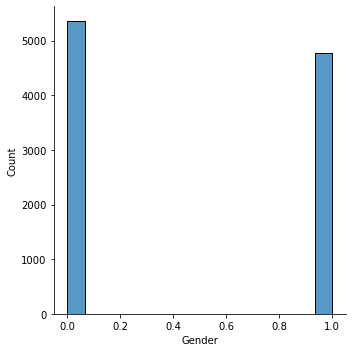

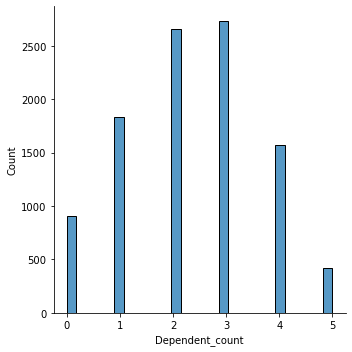

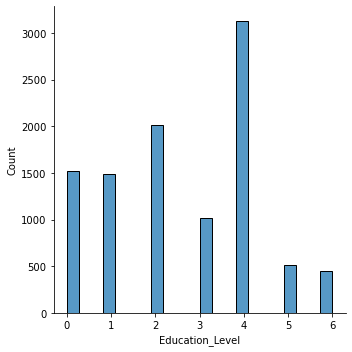

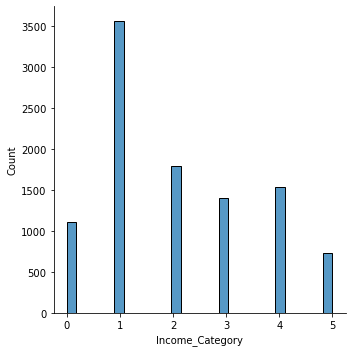

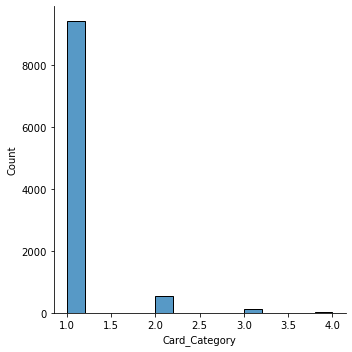

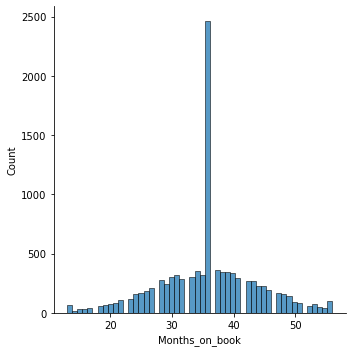

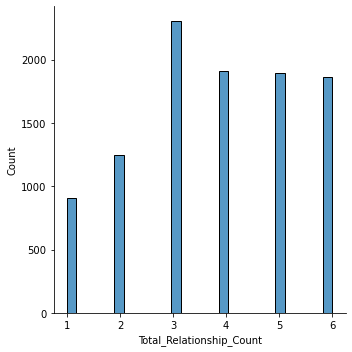

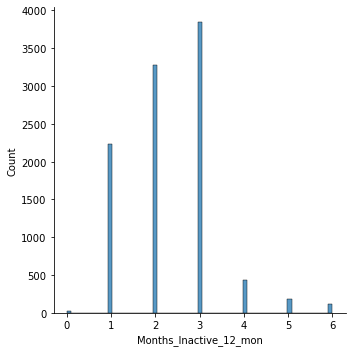

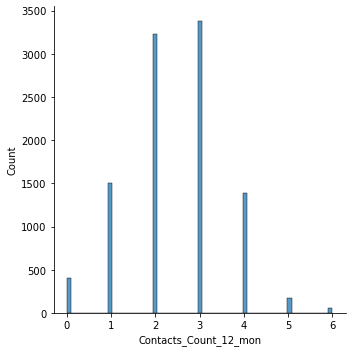

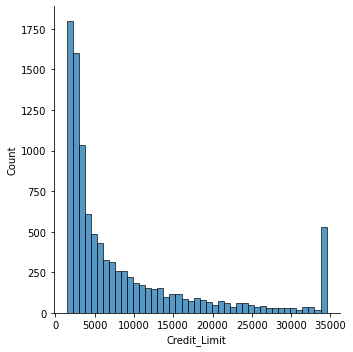

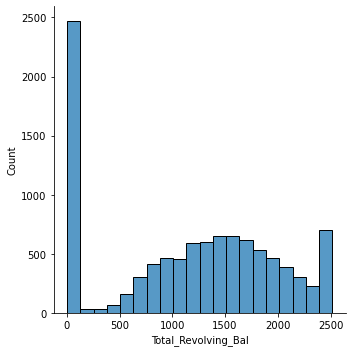

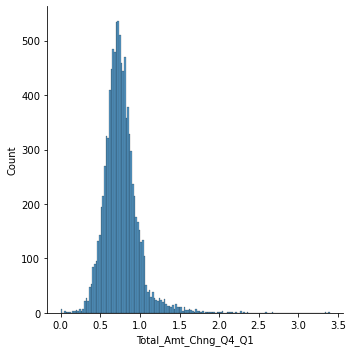

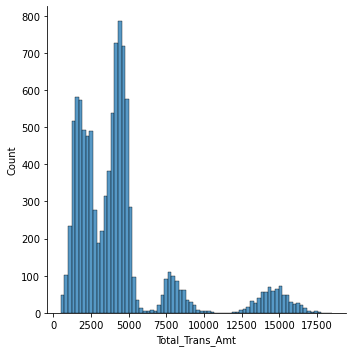

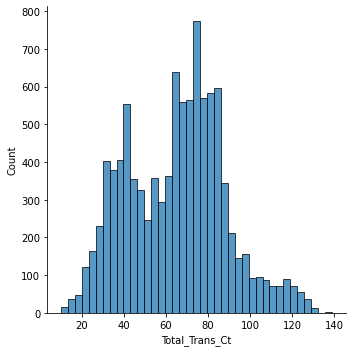

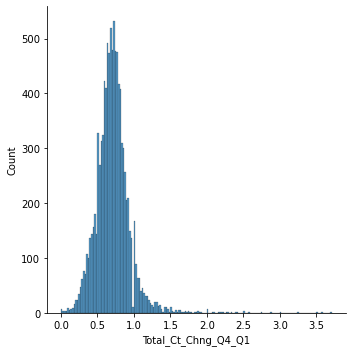

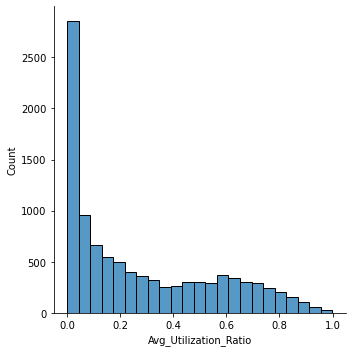

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
for i in df.columns[:]:
    sns.displot(df[i])
    plt.show()

In [30]:
df.skew()

Attrition_Flag             -1.848449
Customer_Age               -0.033605
Gender                      0.116537
Dependent_count            -0.020826
Education_Level             0.002252
Income_Category             0.467760
Card_Category               4.605743
Months_on_book             -0.106565
Total_Relationship_Count   -0.162452
Months_Inactive_12_mon      0.633061
Contacts_Count_12_mon       0.011006
Credit_Limit                1.666726
Total_Revolving_Bal        -0.148837
Total_Amt_Chng_Q4_Q1        1.732063
Total_Trans_Amt             2.041003
Total_Trans_Ct              0.153673
Total_Ct_Chng_Q4_Q1         2.064031
Avg_Utilization_Ratio       0.718008
dtype: float64

In [31]:
df.head(3)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1,45,1,3,2,3,1,39,5,1,3,12691.0,777,1.335,1144,42,1.625,0.061
1,1,49,0,5,4,1,1,44,6,1,2,8256.0,864,1.541,1291,33,3.714,0.105
2,1,51,1,3,4,4,1,36,4,1,0,3418.0,0,2.594,1887,20,2.333,0.000


In [32]:
X = df.drop('Attrition_Flag',axis='columns')
y = df['Attrition_Flag']

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [35]:
X_train

,Customer_Age,Gender,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
6780,47,0,3,1,2,1,35,6,5,2,4543.0,1028,0.799,4093,77,0.571,0.226
4555,43,1,4,0,5,1,37,3,1,3,20695.0,1250,0.605,3924,82,0.783,0.060
811,43,1,3,0,3,1,30,3,2,1,2588.0,1669,0.788,1053,31,0.550,0.645
1940,36,1,3,4,2,1,28,4,2,3,8995.0,1547,0.923,2398,61,0.794,0.172
6658,39,0,1,2,1,1,31,5,2,1,1862.0,726,0.630,5105,79,1.026,0.390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9225,30,1,0,0,3,1,20,1,3,3,23760.0,1349,0.961,13124,103,0.746,0.057
4859,50,1,2,1,3,1,43,4,3,3,4388.0,642,0.815,3836,81,0.723,0.146
3264,60,1,1,0,3,1,50,4,3,0,10698.0,1790,0.981,4095,67,0.914,0.167
9845,51,1,3,3,5,1,40,3,3,2,34516.0,1476,0.763,14145,119,0.776,0.043


In [36]:
log = LogisticRegression()

In [37]:
log.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [38]:
log.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [39]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [40]:
pred = log.predict(X_test)

In [41]:
accuracy_score(y_test,pred)

0.8815165876777251

In [42]:
cross_val_score(log,X_train,y_train,cv=7,scoring='accuracy').mean()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

0.8813693219223173